# La historia jamás contada: Los Anunnaki

<img src = "https://www.sitchinstudies.com/uploads/1/4/3/3/14331428/editor/sumerian-artifact.jpg?1522148947" width = 600>

Es una lástima que las clases de historia de hoy en día no se dediquen a motivar interés sobre los enigmas que nos faltan por resolver. La historia juega un papel clave en el desarrollo humano: _aquél que no conoce su historia está condenado a repetirla_. No sólo esto, pero hay cosas que por intereses políticos o económicos no se revelan o se disfrazan ante la población común y corriente como nosotros.

Son varios los agujeros que hay en las historias sobre las sociedades anteriores a Cristo, los egipcios, los sumerios e incluso los mayas. Dudas sobre su verdadero entendimiento de la naturaleza y sus leyes, las fuentes mismas de esta información. Es así que hago referencia a los sumerios: la primer civilización _documentada_.

La _tableta_ que se encuentra arriba es un pequeño enigma: a la izquierda, tenemos a dos sumerios, y a la derecha una representación de un **Anunnaki**. Los sumerios nunca se dieron crédito por sus conocimientos de agricultura, de astronomía, ni de ingeniería. Todo lo atribuyeron a unos seres _supremos_ denominados Anunnaki. A los medios _mainstream_ les gusta decir que estas son sólo metáforas para hablar de sus deidades, osea, personajes de ficción. Pero hay algunas cuantas inconsistencias con este relato, por ejemplo esta tableta de unos 6000 años de antigüedad en donde se ve un pequeño sistema solar, un aparente conocimiento de una teoría Heliocéntrica (además de una coincidencia en el número de cuerpos celestes que orbitan), poco probable que sea una coincidencia.

Es a partir de aquí que ustedes tienen que _conectar los puntos_ para encontrar algunas piezas apócrifas de este rompecabezas.

## Sección 1: Desempolvando y limpiando los fósiles y reliquias

Aquellas anécdotas que han pasado de libro en libro, que casi no se enseñan en la educación básica de país alguno, han podido ser entendidas por analistas lingüistas, que se dieron a la tarea de decifrar el lenguaje de los sumerios (el _cuneiforme_). Hace un par de años se encontraron más tabletas con escritos de un lenguaje extraño, parecido al _cuneiforme_ pero un tanto más complejo en apariencia. Un reconocidísimo grupo arqueológico de la UNAM conocido como los _topotlatchcos_ se encargó de tomar muestras en la ahora fragmentada mesopotamia para intentar entender este lenguaje y ayudar a rescatar este conocimiento cuya ausencia nos quita el sueño.

Sin embargo, todos estos datos que han recolectado no se van a limpiar ni organizar solos. Es necesario un poderoso equipo de analistas que ayuden a ponerle pies y cabeza a esta información, y eso es lo que harán ustedes. Comenzamos, como típicamente lo hemos hecho en el curso, por cargar las bibliotecas necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Ya saben, graficas chulas
import seaborn as sns
sns.set()

Ahora, vamos a ponernos a cargar los datos: para esta primera sección hay un total de 4 archivos, todos dentro del folder 'datos_exp_mesop', llamados Iraq.txt, Syria.txt, ArabiaSaudita.txt y Turquia.txt. Cada archivo tiene registros de lo que se cree son la prueba del pase de conocimiento de los Anunnaki a los Sumerios, reportados por cada una de las subdivisiones de los _topotlatchcos_ asignada a cada región. La descripción de las columnas es la siguiente:

* `Tableta`: Un identificador de la tableta registrada
* `NumLineasV`: Número de líneas verticales en el pictograma/caracter
* `NumLineasH`: Número de líneas horizontales en el pictograma/caracter
* `NumLineasD`: Número de líneas diagonales en el pictograma/caracter
* `NumCirc`: Número de círculos en el pictograma/caracter.
* `Profundidad`: La profundidad promedio del caracter
* `Ancho`: El ancho promedio de las líneas en el caracter
* `Rugosidad`: La rugosidad del trazo.

In [2]:
df = pd.read_csv('annk.txt')
df.head()

,Tableta,NumLineasV,NumLineasH,NumLineasD,NumCirc,Profundidad,Ancho,Rugosidad
0,0,3.0,0.0,0.0,0.0,1.661528,1.515182,1.259468
1,0,0.0,0.0,3.0,1.0,0.964546,0.905444,0.945140
2,0,0.0,0.0,2.0,1.0,0.942217,0.896519,0.966872
3,0,2.0,1.0,0.0,2.0,1.294263,2.482933,1.337769
4,0,1.0,0.0,0.0,0.0,1.507531,1.542279,1.381450


#### Ejercicio 0

Calcule cuál es la cantidad promedio de caracteres por tableta encontrada. También calcule la desviación estandar de este número.

__Hint__: Use la función `.value_counts()`

In [3]:
carPorTableta = df["Tableta"].value_counts().mean()
print("Promedio: " + str(carPorTableta))
stdDev = df["Tableta"].value_counts().std()
print("Desviación: " + str(stdDev))

Promedio: 485.728813559322
Desviación: 56.02436298748052


#### Ejercicio 1
Encuentre el número de combinaciones únicas de los valores de las columnas `NumLineasV`, `NumLineasH`, `NumLineasD` y `NumCirc`. Para ello, puede hacer un uso inteligente del método `.drop_duplicates()` de los dataframe de pandas (si no lo entienden, busquen en internet).

In [4]:
# Convenientemente, aquí está una lista con los nombres de las variables que definen un caracter.
vc = ["NumLineasV", "NumLineasH", "NumLineasD", "NumCirc"]
dfi = df.copy()
numCharsI = len(dfi.drop_duplicates(vc)["Tableta"])
print("Número de combinaciones únicas: " + str(numCharsI))

Número de combinaciones únicas: 59


#### Ejercicio 2
Ahora, hay que añadir una columna llamada "Id", en donde vamos a colocar el identificador para cada combinación de caracteres; es decir, la primer combinación será reconocida por "1", la segunda por "2" y así.

__Hint__: En el siguiente código les dejo la manera más fácil y rápida de hacerlo. Construyan un diccionario que haga un mapeo de una cadena de caracteres (la combinación de las 4 columnas que definen al caracter) a un entero (el identificador).

La función "func" hace casi todo (incrementa el contador y todo), basta con que usen el método `apply` en el dataframe con las combinaciones únicas. Como última pista, si ustedes hacen `str(df.loc[0][vc].values)` van a obtener una cadena de caracteres única a esa combinación (por ejemplo, `'[3 0 0 0]'`). Usen esto para sacarle provecho al "apply"

In [115]:
#Intendo fallido
#tabs = dfi.index.values
#temp=[]
#for i in tabs:
#    temp.append(str(dfi.loc[i][vc].values))
#rowToId = {i:str(temp[i])}

In [5]:
#Este es el diccionario que va a mapear de las combinaciones a los enteros
rowToId = {}
#Este es un contador, para generar los Ids
c = 1
# Esta función va a añadir cada nueva combinación al diccionario
def func(row):
    global c
    #Cuál debe ser el argumento del diccionario???
    rowToId[str(row.values)] = c
    c+=1
# Ya sólo falta que pasen 
dfi[vc].drop_duplicates().apply(func, axis = 1);
# Ahora que el diccionario está hecho, basta con que añadan la columna que falta al dataframe, usando este diccionario
#dfi["Id"] = rowToId
dfi["Id"] = dfi[vc].apply(lambda row: rowToId[str(row.values)] ,axis=1)
#Quitamos las ahora inútiles columnas
dfi = dfi.drop(vc, axis = 1)
dfi.head()

,Tableta,Profundidad,Ancho,Rugosidad,Id
0,0,1.661528,1.515182,1.259468,1
1,0,0.964546,0.905444,0.945140,2
2,0,0.942217,0.896519,0.966872,3
3,0,1.294263,2.482933,1.337769,4
4,0,1.507531,1.542279,1.381450,5


#### Ejercicio 3
Se sabe que en la escritura de los Anunnaki no sólo importan los símbolos dibujados, también hay algunas características físicas que proporcionan información al lector. Para ello están las últimas 3 columnas del dataframe, `Profundidad` (medida en milímetros), `Ancho` (medida en milímetros) y `Rugosidad` (medida en micrómetros). Con ayuda de estas 3 columnas deberán tener ustedes el poder de identificar cuántos grupos distintos de caracteres hay: Es decir, los Anunnaki tenían grupos de caracteres dentro de su escritura determinados por las tres variables físicas antes mencionadas. Para su conveniencia está aquí una clase que hace el método de K-Means, al cuál le falta sólo una pieza: la misma función/lambda que hicieron en clase, señalada con muchos signos de número:

In [6]:
class KMeans:
    def __init__(self, data, centroids = None):
        self.data = data
        self.centroids = centroids
        #Rellene la siguiente lambda para calcular el índice del centroide que más cerca esté a un renglón
        ###################################################################################################
        self.closest = lambda row : np.argmin(np.sum(np.square(np.matrix(row)-self.centroids),axis=1))

        ###################################################################################################
        
    def run(self,k = 2):
        """Calculates the k centroids to divide the data, using k-means++ as initial points"""
        #El siguiente argumento hace una matriz de "Rangos"
        ranges = np.concatenate( (np.matrix(self.data.min().values),np.matrix(self.data.max().values)) ).T
        self.centroids = self.kmeanspp_init(ranges, k)
        
        changed = True;
        labels = None
        counter = 0
        while changed and counter < 8:
            oldLabels = labels
            labels = self.data.apply(self.closest, axis = 1)

            for i in range(0, k):
                if (labels==i).any():
                    self.centroids[i,:] = (self.data[labels==i].sum().values)/np.sum(labels==i)

            changed = oldLabels != labels
            changed = changed.any()
            counter = counter+1
        return self.centroids, labels
    
    def predict(self, newData):
        result = newData.copy()
        return result.apply(self.closest, axis = 1)
        
    def random_init(self, ranges, k):
        #Con ella, se hace un vector aleatorio de las dimensiones de cada renglón de nuestros datos
        rVec = np.matrix(np.random.random(ranges.shape[0])).T
        #Se añade un centroide
        centroids = (np.multiply(ranges[:,1]-ranges[:,0],rVec) + ranges[:,0]).T
        #Se añaden el resto de los centroides
        for i in range(1,k):
            rVec = np.matrix(np.random.random(ranges.shape[0])).T
            centroids = np.concatenate((centroids,(np.multiply(ranges[:,1]-ranges[:,0],rVec) + ranges[:,0]).T))
        return centroids
    
    def kmeanspp_init(self, ranges, k):
        #Con ella, se hace un vector aleatorio de las dimensiones de cada renglón de nuestros datos
        rVec = np.matrix(np.random.random(ranges.shape[0])).T
        #Se añade un centroide
        centroids = (np.multiply(ranges[:,1]-ranges[:,0],rVec) + ranges[:,0]).T
        #Se añaden el resto de los centroides
        for i in range(1,k):
            computeDistance = lambda row: np.min(np.sum(np.square(centroids - np.matrix(row)), axis = 1))
            distances = self.data.apply(computeDistance, axis = 1)
            cumprobs = distances / distances.sum()
            cumprobs = cumprobs.cumsum()
            r = np.random.random()
            ind = np.where( cumprobs >= r)[0][0] #First element of list in tupple
            centroids = np.concatenate((centroids,np.matrix(self.data.iloc[ind])))
        return centroids

Una vez que hayan rellenado esa línea, tienen ya una clase que puede hacer el algoritmo de K-Means con un comienzo inteligente conocido como _k-means++_ (da una convergencia más rápida). Además de eso, tenga usted la función _codito_:

In [7]:
def codito(data, ki = 2, kf = 9):
    """Calcula el puntaje para las k entre ki y kf"""
    costs = pd.DataFrame(columns = ["K", "Score"])
    centroids = []
    labels = []
    km = KMeans(data)
    for k in range(ki,kf+1):
        lowestCost = None
        lowestC = None
        for j in range(0,4):
            c,l = km.run(k)
            tmpdf = data.copy()
            tmpdf["Label"] = l
            currentCost = np.sum(
                tmpdf.apply(lambda row: np.sum(np.square(np.matrix(row[cl]) - c[int(row["Label"]), :])), axis = 1)
            )
            lowestC = c if lowestC is None or lowestCost > currentCost else lowestC
            lowestCost = currentCost if lowestCost is None or lowestCost > currentCost else lowestCost
        costs.loc[costs.shape[0]] = [k, lowestCost]
        centroids.append(lowestC)
        print("Para k = " + str(k)+ ", puntaje: " + str(costs.iloc[costs.shape[0]-1].Score))
    return costs, centroids

Esta función ejecuta K-Means para distintas k's y les asigna un "score" (en este caso, la suma de las distancias al cuadrado de cada punto al centroide más cercano). Como fue discutido en clase, estos datos se verán como un codito, y el punto de inflexión es la k óptima.

Van a necesitar esto porque __no se sabe__ en cuántos grupos dividían sus caracteres los Annunaki.

Ejecute la función codito, y enuentre la k óptima. Note que el argumento de la función codito es un dataframe pero que sólo contiene las columnas en donde se ejecutará k-Means (utilice la lista `cl` otorgada abajo)

__Hint__: **NO EJECUTEN EL ALGORITMO NI EL CODITO CON TODOS LOS DATOS**. K-Means es costoso (en tiempo), y ustedes lo tienen muy limitado. En lugar de eso, hagan un nuevo dataframe pequeño (de unos 2000 renglones) que tenga un "muestreo" del dataframe original: es decir, tomen de manera __uniformemente aleatoria__ 2000 renglones del dataframe original, y usen este dataframe para encontrar la k-óptima.

__Hint 2__: Pueden generar 2000 índices únicos entre 0 y 50,000 así: `random.sample(range(0, 50000), 2000)`

Para k = 2, puntaje: 191.0793550893352
Para k = 3, puntaje: 110.96601338413438
Para k = 4, puntaje: 58.261954570328264
Para k = 5, puntaje: 48.54507283168176
Para k = 6, puntaje: 41.78447080895111
Para k = 7, puntaje: 36.054442716215675
Para k = 8, puntaje: 34.38171326943073
Para k = 9, puntaje: 34.87660314906032


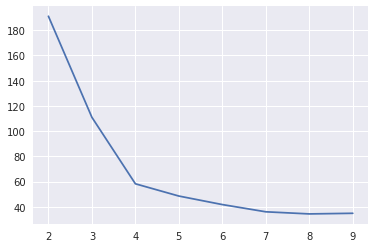

In [8]:
cl = ["Profundidad", "Ancho", "Rugosidad"]

samp=random.sample(range(0,57316),2000)
dfs = df.iloc[samp]

costs, centroids = codito(dfs[cl])
plt.plot(costs.K, costs.Score)

#### Ejercicio 4

De los grupos que haya encontrado en la parte anterior, conteste lo siguiente:

* Cuántos grupos tienen caracteres que NO están compartidos con otros grupos?
* Cuántos grupos tienen caracteres que SÍ están compartidos con otros grupos?

__Hint__: la estructura de datos `set` de python es de gloriosa ayuda: Ustedes pueden añadir todos los "id" a un set por cada grupo, para ver qué id's están contenidos en cada grupo. Con el operador de comparación (==) ya tienen la respuesta. Incluso existe la función `isdisjoint` (ejemplo: set([0,1]).isdisjoint(set([1,2])) regresará falso pues los sets comparten el 1).

Métodos que pueden ser útiles
* `.groupby('Label')['Id'].unique().tolist()` (pandas, hace un df con los indices únicos pertenecientes a cada label)
* `.groupby('Label').size()` (pandas, número de elementos en cada "grupo" denominado por "label")

In [10]:
dfl = dfi.copy()
KM = KMeans(dfl[cl], centroids[2])
dfl["Label"] = KM.predict(dfl[cl])
clusterset = dfl.groupby('Label')['Id'].unique().tolist()
# Con un for pueden poner aquí los "conjuntos" de Id's que pertenecen a cada cluster que encontraron
sets = []
for i in clusterset:
    sets.append(set(i))
    

#Tienen que rellenar esta lista con los índices de los clusters que no sean disjuntos
joinsets = []
for i in range(len(sets)):
    for j in range(len(sets)):
        if i!=j:
            if sets[i].isdisjoint(sets[j]) == False:
                joinsets.append(i)
                


# Ejercicio 5

Hemos recibido una buena nueva del equipo: Los grupos de caracteres que comparten caracteres son la escritura principal, son letras vaya. Así que podemos "considerarlos" lo mismo.

Haga un nuevo dataframe donde estén todos los caracteres que son de grupos no disjuntos.

__Hint__: Con la lista creada anteriormente, pueden usar `.apply` y una lambda que verifique si el campo `Label` de cada renglón está en la lista, algo como `row.Label in jointsets` basta

In [11]:
# Aquí va el dataframe
alfa = dfl[dfl["Label"].apply(lambda row: row in joinsets)]
#Usen aquí apply sobre el dataframe dfl
alfa.head()

,Tableta,Profundidad,Ancho,Rugosidad,Id,Label
0,0,1.661528,1.515182,1.259468,1,3
1,0,0.964546,0.905444,0.945140,2,1
2,0,0.942217,0.896519,0.966872,3,1
4,0,1.507531,1.542279,1.381450,5,3
5,0,0.921205,1.059083,1.170359,6,1


#### Ejercicio 6

Se sabe que los universitarios que mandamos a hacer la exploración son fanáticos del alcohol, así que es probable que haya valores atípicos, es decir, caracteres que ocurren sólo un par de veces. Puede considerar por ejemplo la letra de menor frecuencia [en el inglés](https://en.wikipedia.org/wiki/Letter_frequency), en el [español](https://es.wikipedia.org/wiki/Frecuencia_de_aparici%C3%B3n_de_letras), o en [todos estos otros idiomas](https://en.wikipedia.org/wiki/Letter_frequency#Relative_frequencies_of_letters_in_other_languages). Grafique las frecuencias de cada una de estas letras únicas, descarte aquellas que no sea probable que sean una letra, y calcule nuevamente el número de letras.

__Hint__: el método `.value_counts()` de pandas (que funciona sobre una columna del df, sobre una serie vaya) se encarga de contar cuántas veces se repite un elemento. Use este método para después, calcular una serie con el porcentaje de veces que aparece cada caracter. Para graficar el histograma, utilice la función `.plot(kind = "bar")`

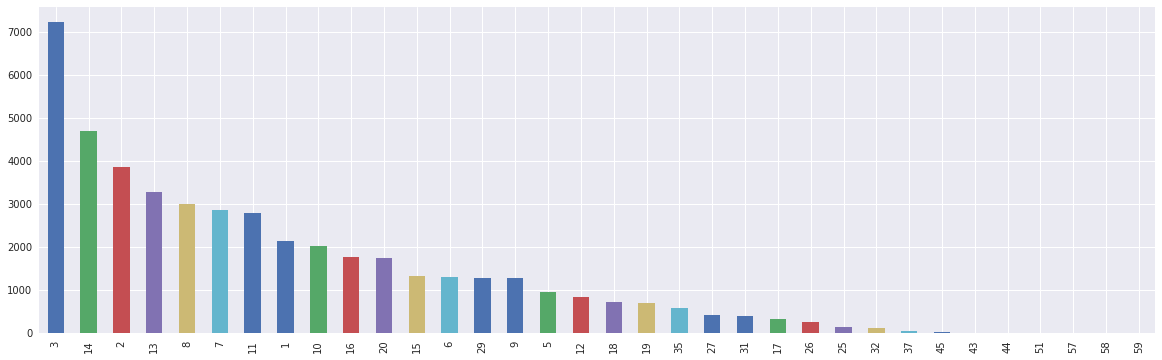

In [12]:
figurasChulas = True
if(figurasChulas):
    oldParams = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [20, 6]

# Calculen aquí las frecuencias y usen plot
    
alfa["Id"].value_counts().plot(kind = "bar")

if(figurasChulas):
    plt.rcParams["figure.figsize"] = oldParams


In [13]:
print("Frecuencias relativas de cada caracter")
dfr=alfa["Id"].value_counts()/alfa["Id"].value_counts().sum()*100
dfr

Frecuencias relativas de cada caracter


3     15.662651
14    10.170411
2      8.359926
13     7.109519
8      6.488657
7      6.184739
11     6.050147
1      4.652122
10     4.413329
16     3.848909
20     3.796809
15     2.885054
6      2.850320
29     2.798220
9      2.763486
5      2.064474
12     1.827852
18     1.547813
19     1.491371
35     1.285141
27     0.933464
31     0.861826
17     0.683816
26     0.560078
25     0.284381
32     0.249647
37     0.102030
45     0.039075
43     0.023879
44     0.002171
51     0.002171
57     0.002171
58     0.002171
59     0.002171
Name: Id, dtype: float64

In [14]:
#Deshaganse aquí de los caracteres que son cláramente outliers
#Dado que en el checo la q tiene frecuencia relativa de 0.001%, considero esto como cota inferior

beta = dfr[dfr.apply(lambda row: row < 0.005)]

numCharsFinal = len(beta)
print(numCharsFinal,"OMG")

5 OMG


#### Ejercicio 7 (opcional)
Dadas las frecuencias que hay en el último histograma, adivine la respuesta a las siguientes preguntas:

* De los k grupos que encontró, el de menor cardinalidad tiene una estructura muy curiosa. Vea los identificadores que lo componen, y vea qué geometría compone los caracteres (lineas horizontales, verticales, diagonales y círculos). Qué es lo que contiene este grupo?

* Viendo la distribución de frecuencias de los grupos no disjuntos, y viendo [estas tablas](https://en.wikipedia.org/wiki/Letter_frequency#Relative_frequencies_of_letters_in_other_languages), conteste: Qué idioma hablaban los Anunnaki que se sigue usando hoy en día?

* Si ya sabe qué idioma es, adivine qué simbolizan los grupos que componen el alfabeto (los que resultaron de los k promedios)